# General Evaluation of the Models

In [1]:
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np

def generate_train_test_loss(train_loss, test_loss, model_name, loss_type='Loss'):
    myrcparams = RcParams({'axes.axisbelow': True,
            'axes.edgecolor': 'white',
            'axes.facecolor': '#EAEAF2',
            'axes.grid': True,
            'axes.labelcolor': '.15',
            'axes.linewidth': 0.0,
            'figure.facecolor': 'white',
            'font.family': ['serif'],
            'grid.color': 'white',
            'grid.linestyle': '--',
            'image.cmap': 'Greys',
            'legend.frameon': False,
            'legend.numpoints': 1,
            'legend.scatterpoints': 1,
            'lines.solid_capstyle': 'round',
            'text.color': '.15',
            'xtick.color': '.15',
            'xtick.direction': 'out',
            'xtick.major.size': 0.0,
            'xtick.minor.size': 0.0,
            'ytick.color': '.15',
            'ytick.direction': 'out',
            'ytick.major.size': 0.0,
            'ytick.minor.size': 0.0})

    sns.set_style("whitegrid")
    RcParams.update(myrcparams)


    fig, ax = plt.subplots(figsize =(8.5,5), dpi=300)

    x = np.arange(1,len(train_loss)+1)

    ax.plot(x, train_loss, '-o', label = "Train Loss", linewidth = 1.5)
    ax.plot(x, test_loss, '-o', label = "Test Loss", linewidth = 1.5)

    ax.set_xlabel("Epochs", fontsize = 24)
    ax.set_ylabel(loss_type, fontsize = 24)

    ax.tick_params(
        axis = 'both',
        labelsize = 16
    )
    ax.legend(fontsize = 20)
    ax.set_title(f"{loss_type} vs Epochs\n({model_name})", fontsize = 24, fontweight = 'bold')

    plt.savefig(f"../results/images/{loss_type} vs Epochs({model_name}).jpg", dpi = 300, bbox_inches = 'tight')

# Create R-CNN Training/Test Loss Plots

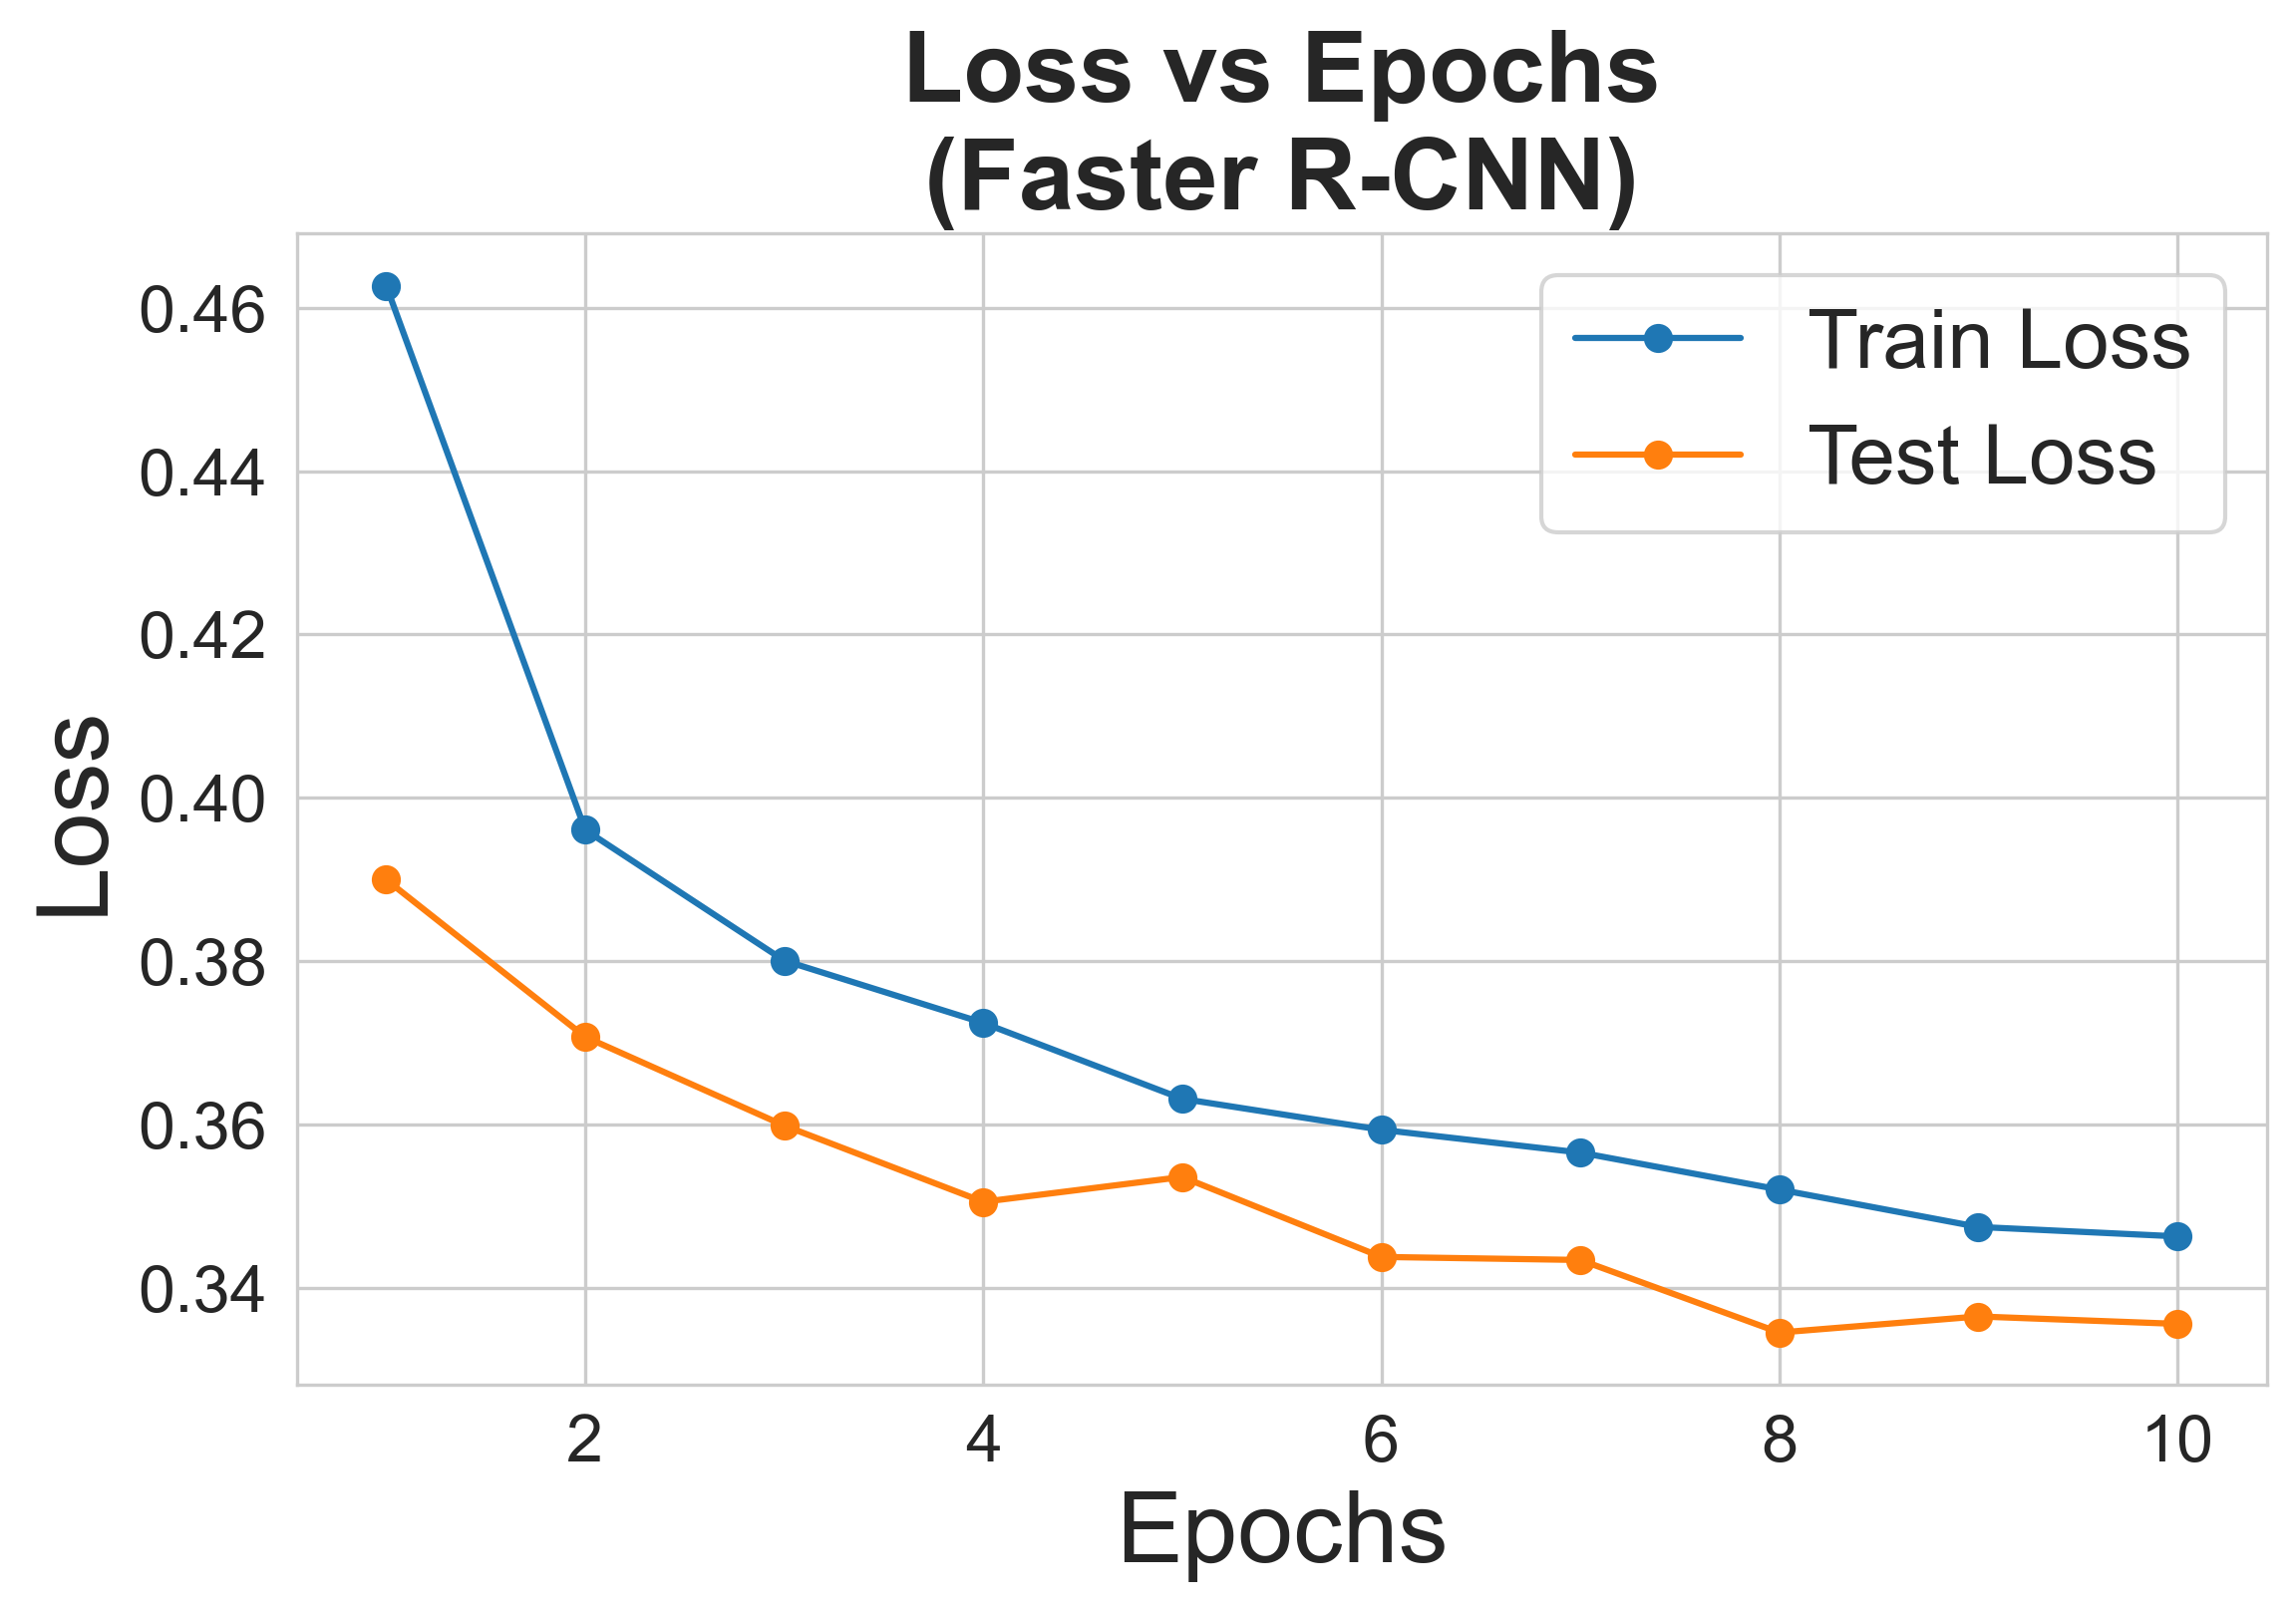

In [2]:
# RNN
import pandas as pd

rnn_loss_df = pd.read_csv('../results/rcnn/train_val_results.csv')
rnn_loss_df

generate_train_test_loss(rnn_loss_df['training_loss'], rnn_loss_df['validation_loss'], 'Faster R-CNN')

# Create Yolo Training/Test Loss Plots

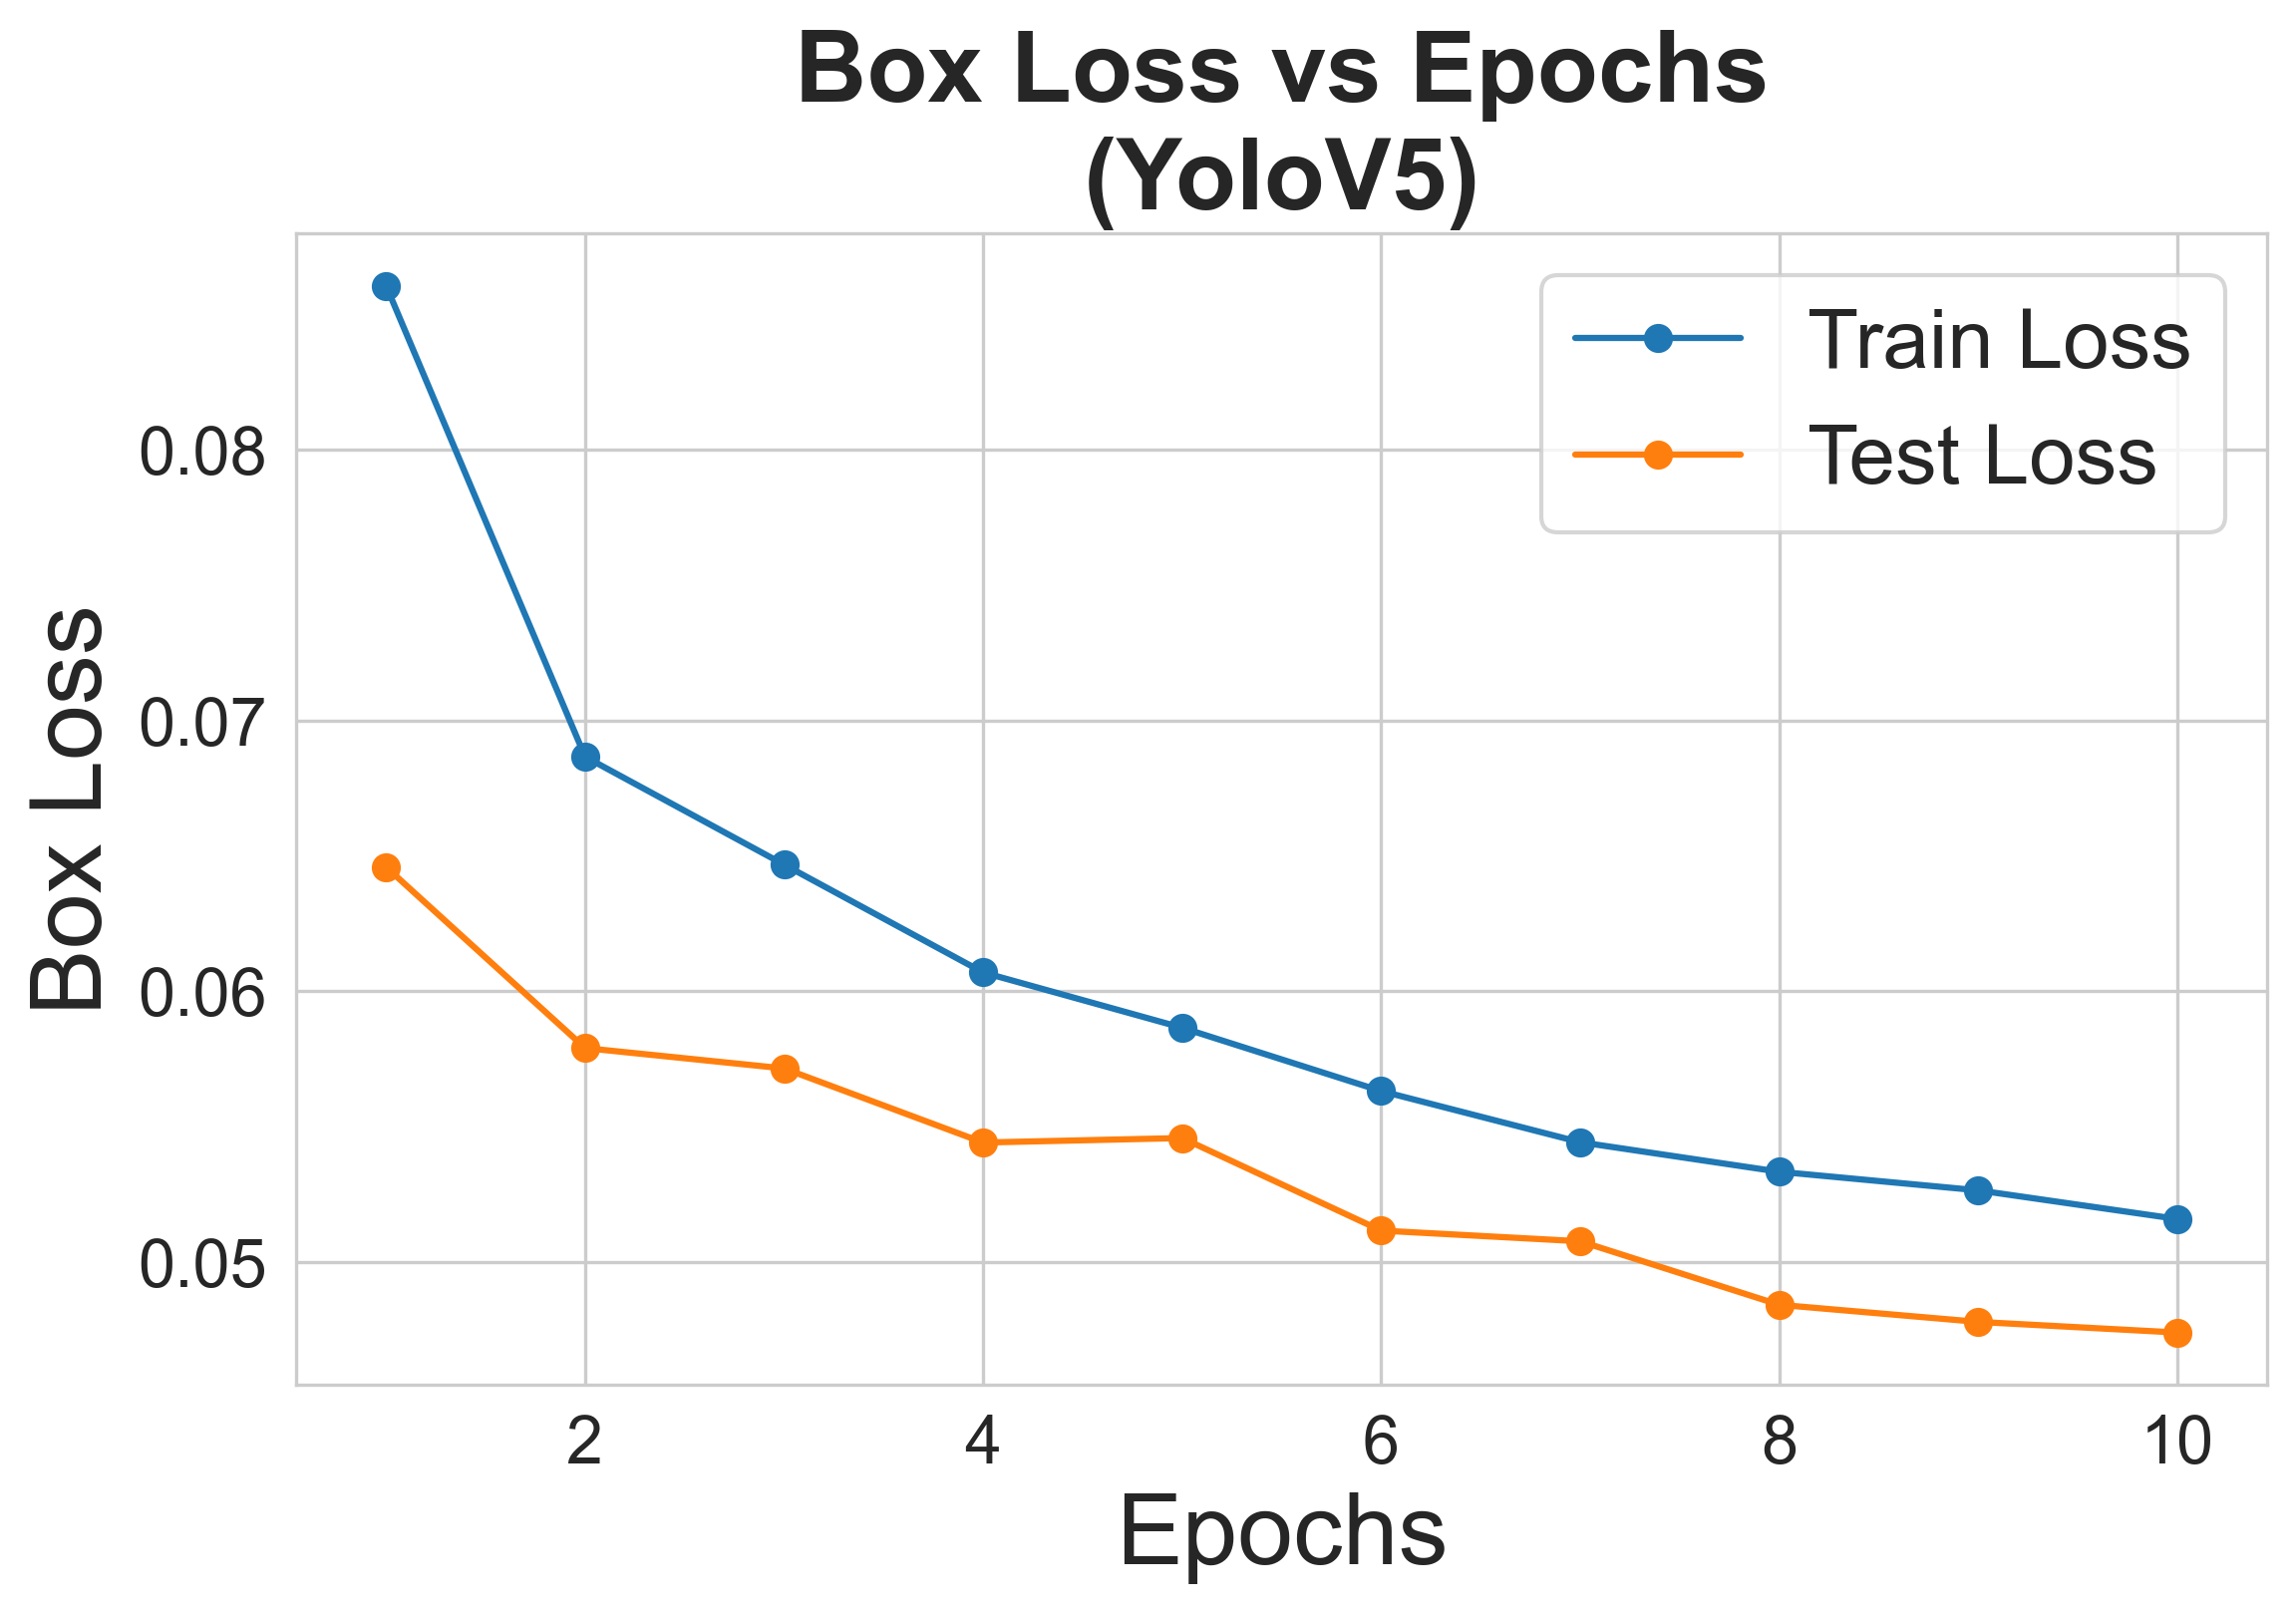

In [ ]:
# Yolo
yolo_loss_df = pd.read_csv('../results/yolo/training_results.csv')
yolo_loss_df.columns = [column.strip() for column in yolo_loss_df.columns]

generate_train_test_loss(yolo_loss_df['train/box_loss'], yolo_loss_df['val/box_loss'], 'YoloV5', 'Box Loss')

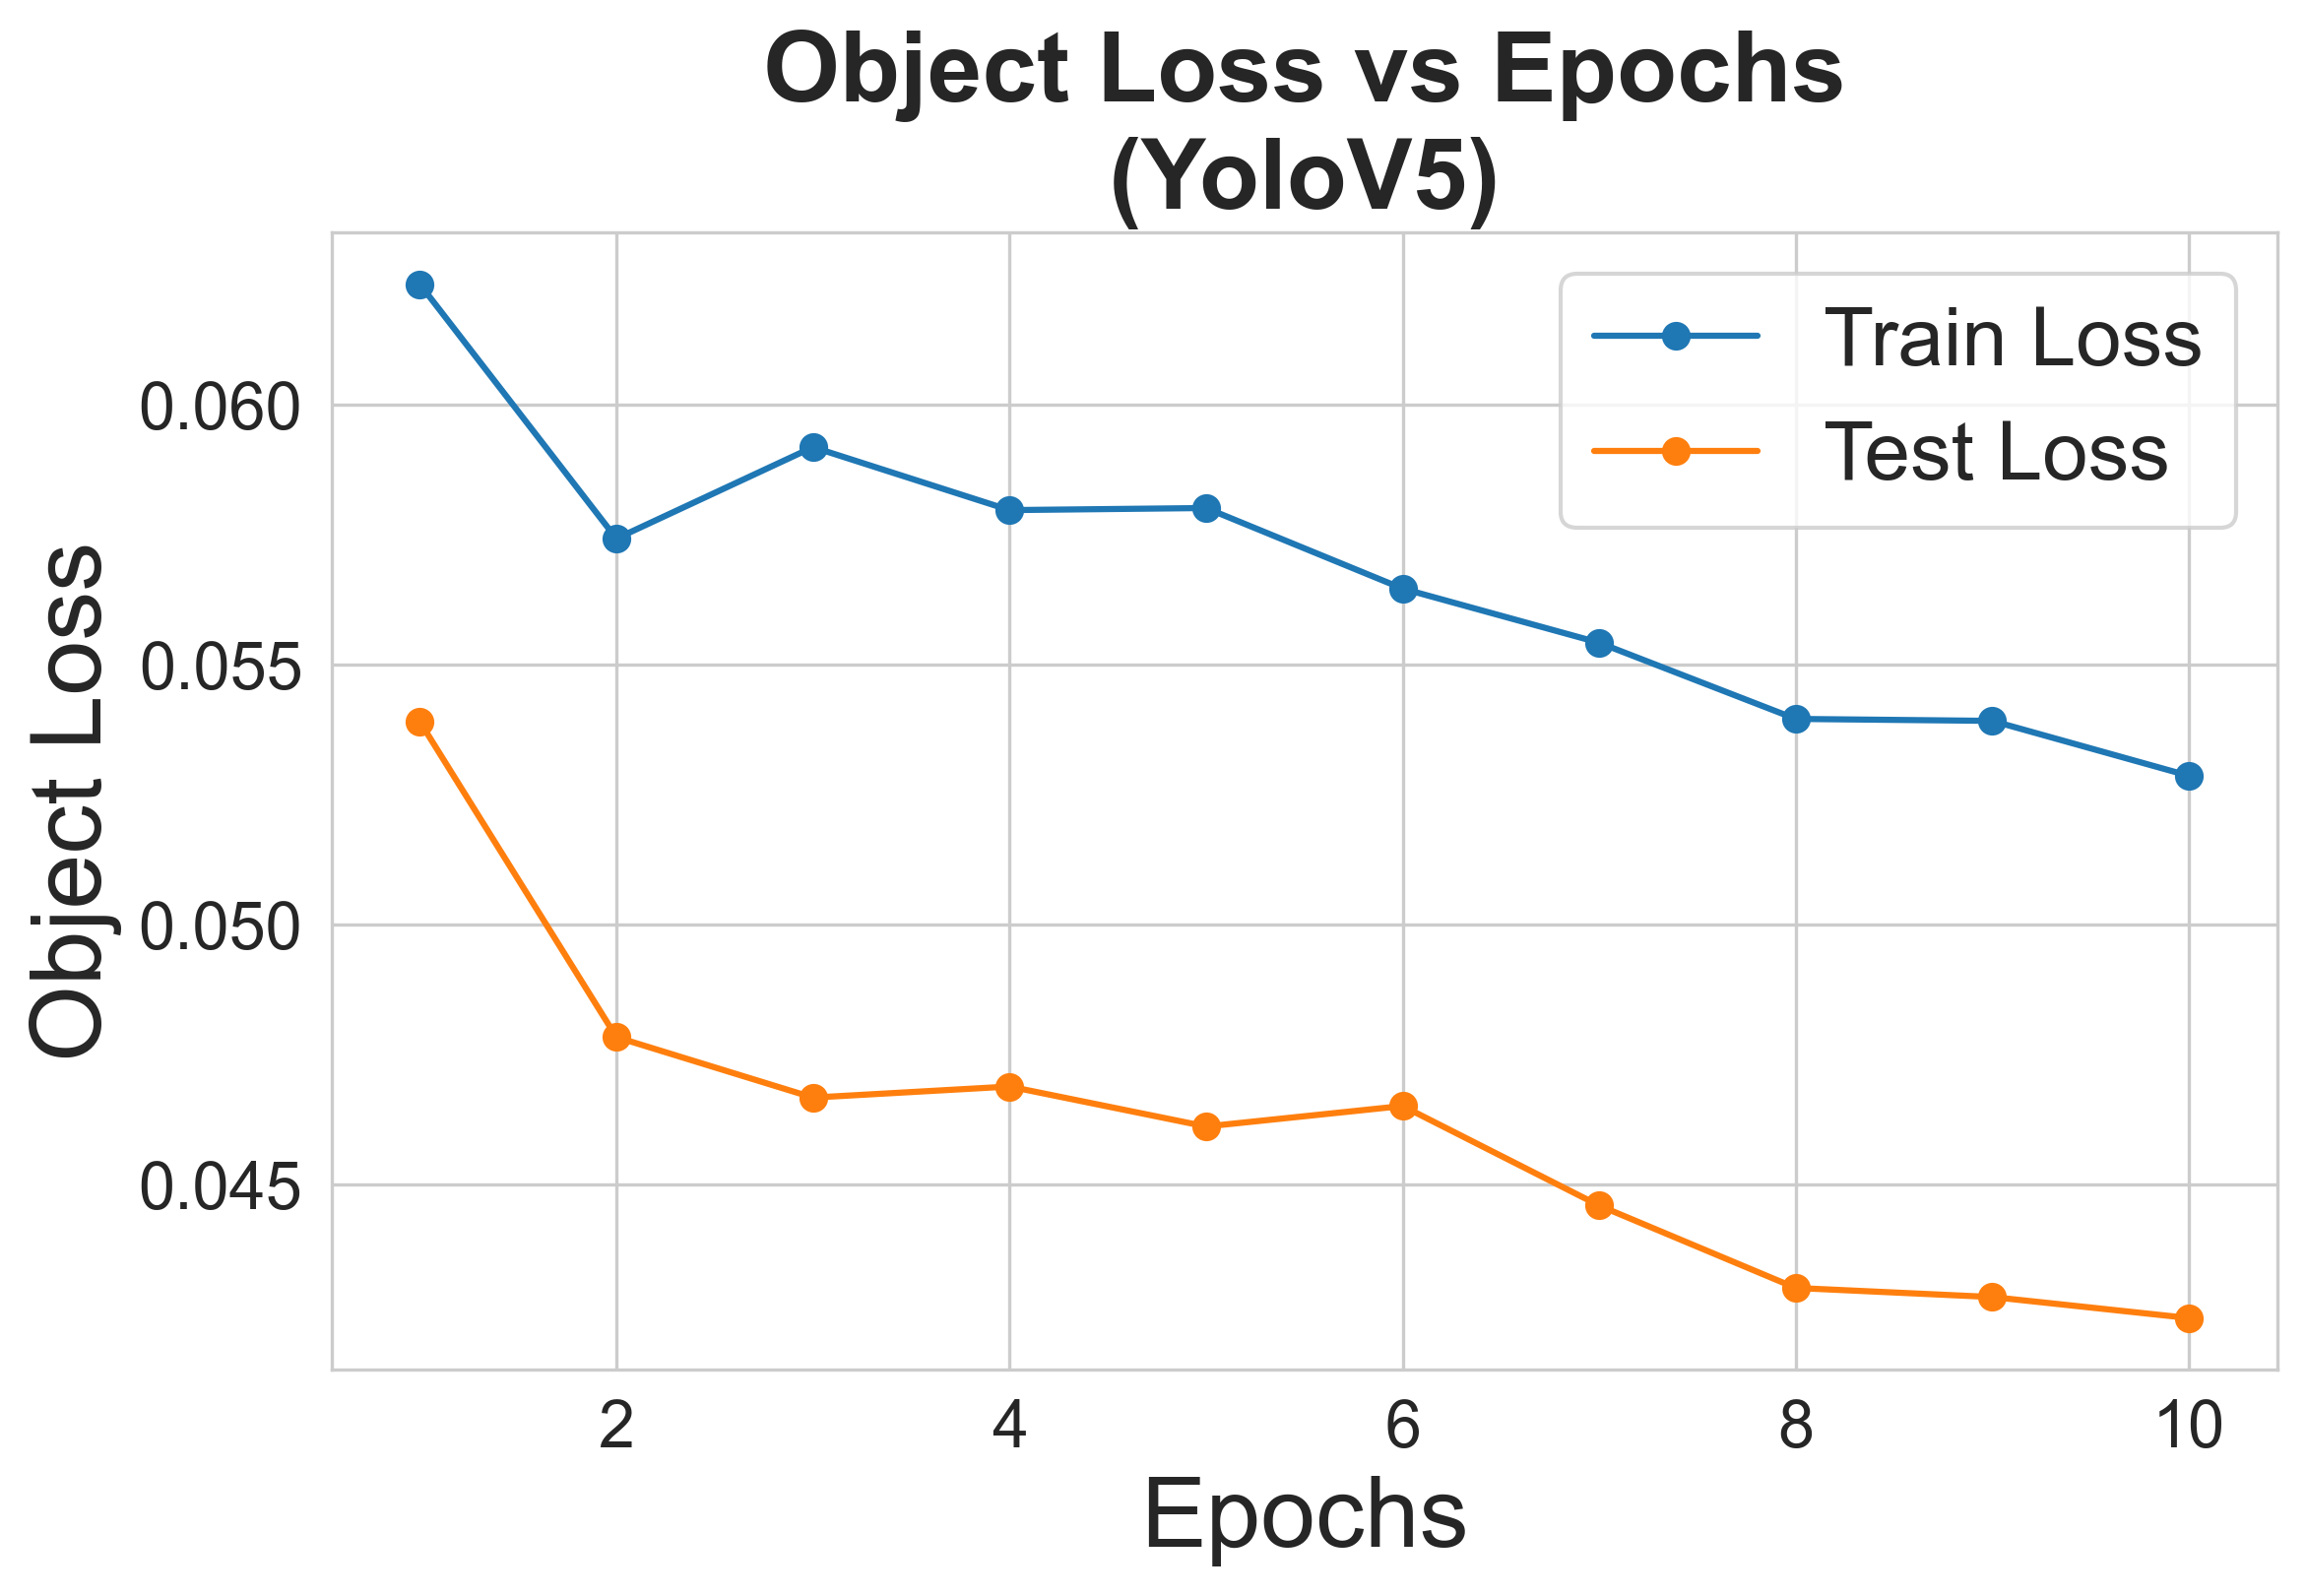

In [ ]:
generate_train_test_loss(yolo_loss_df['train/obj_loss'], yolo_loss_df['val/obj_loss'], 'YoloV5', 'Object Loss')

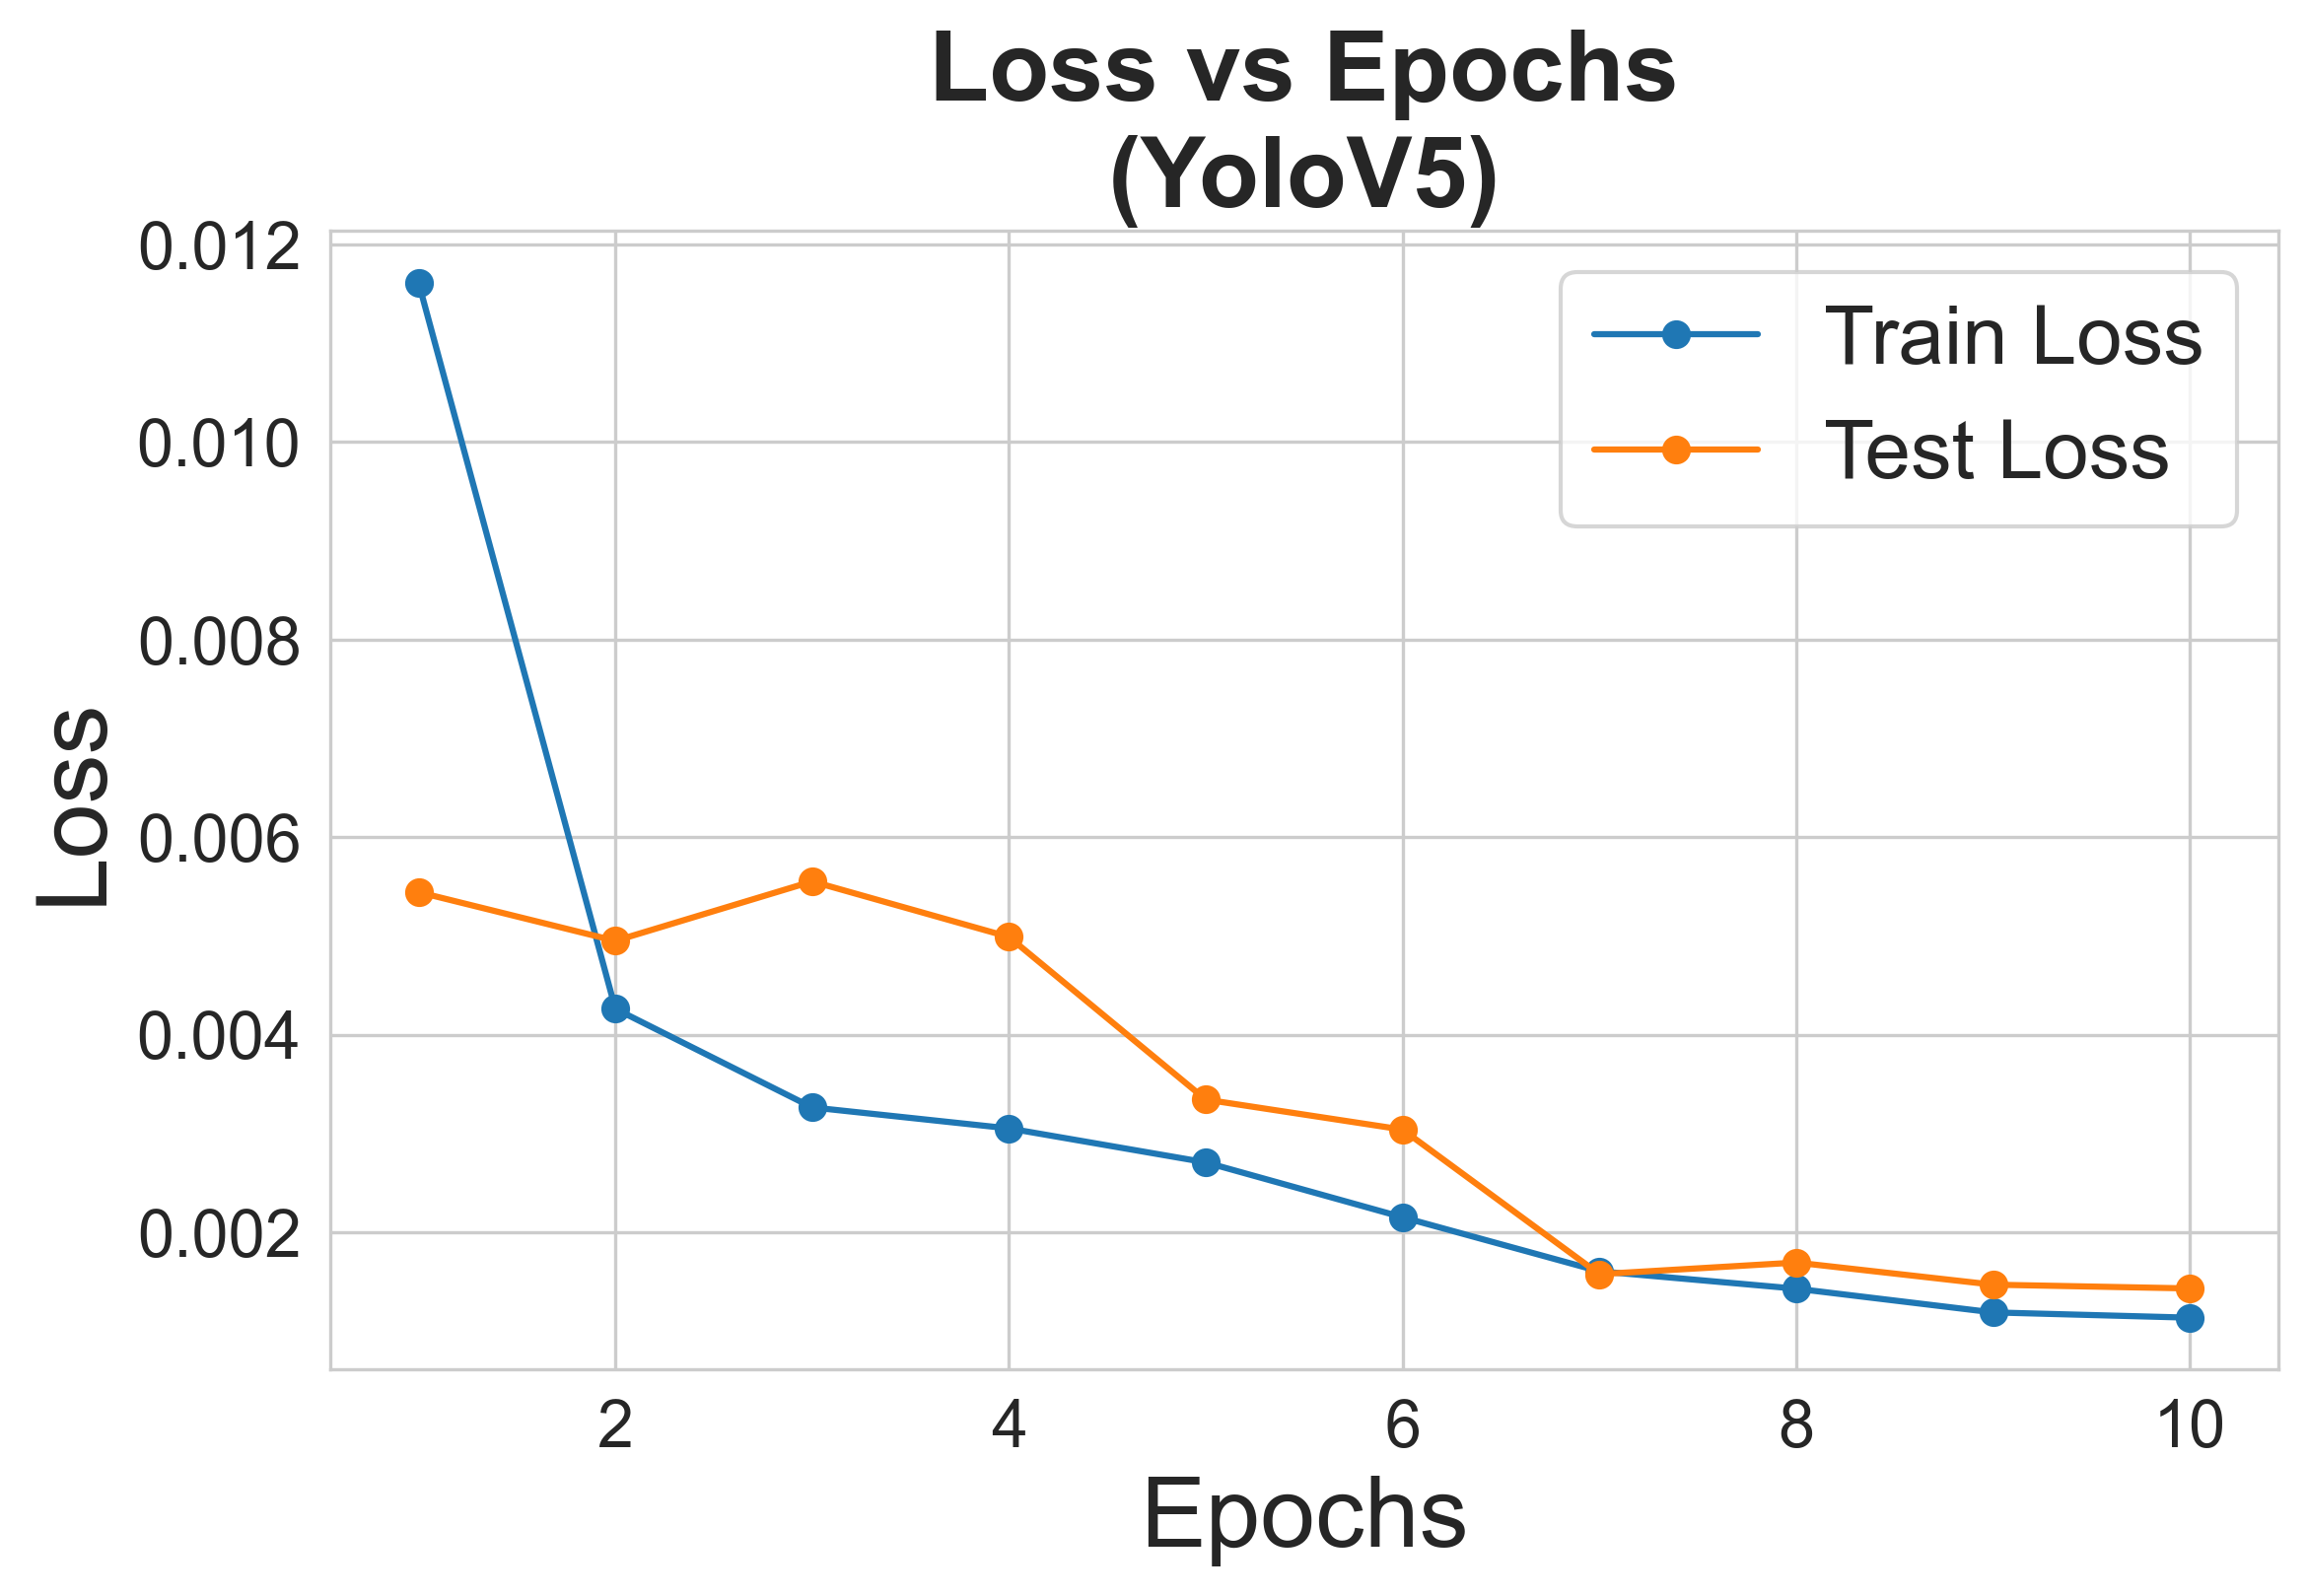

In [ ]:
generate_train_test_loss(yolo_loss_df['train/cls_loss'], yolo_loss_df['val/cls_loss'], 'YoloV5')

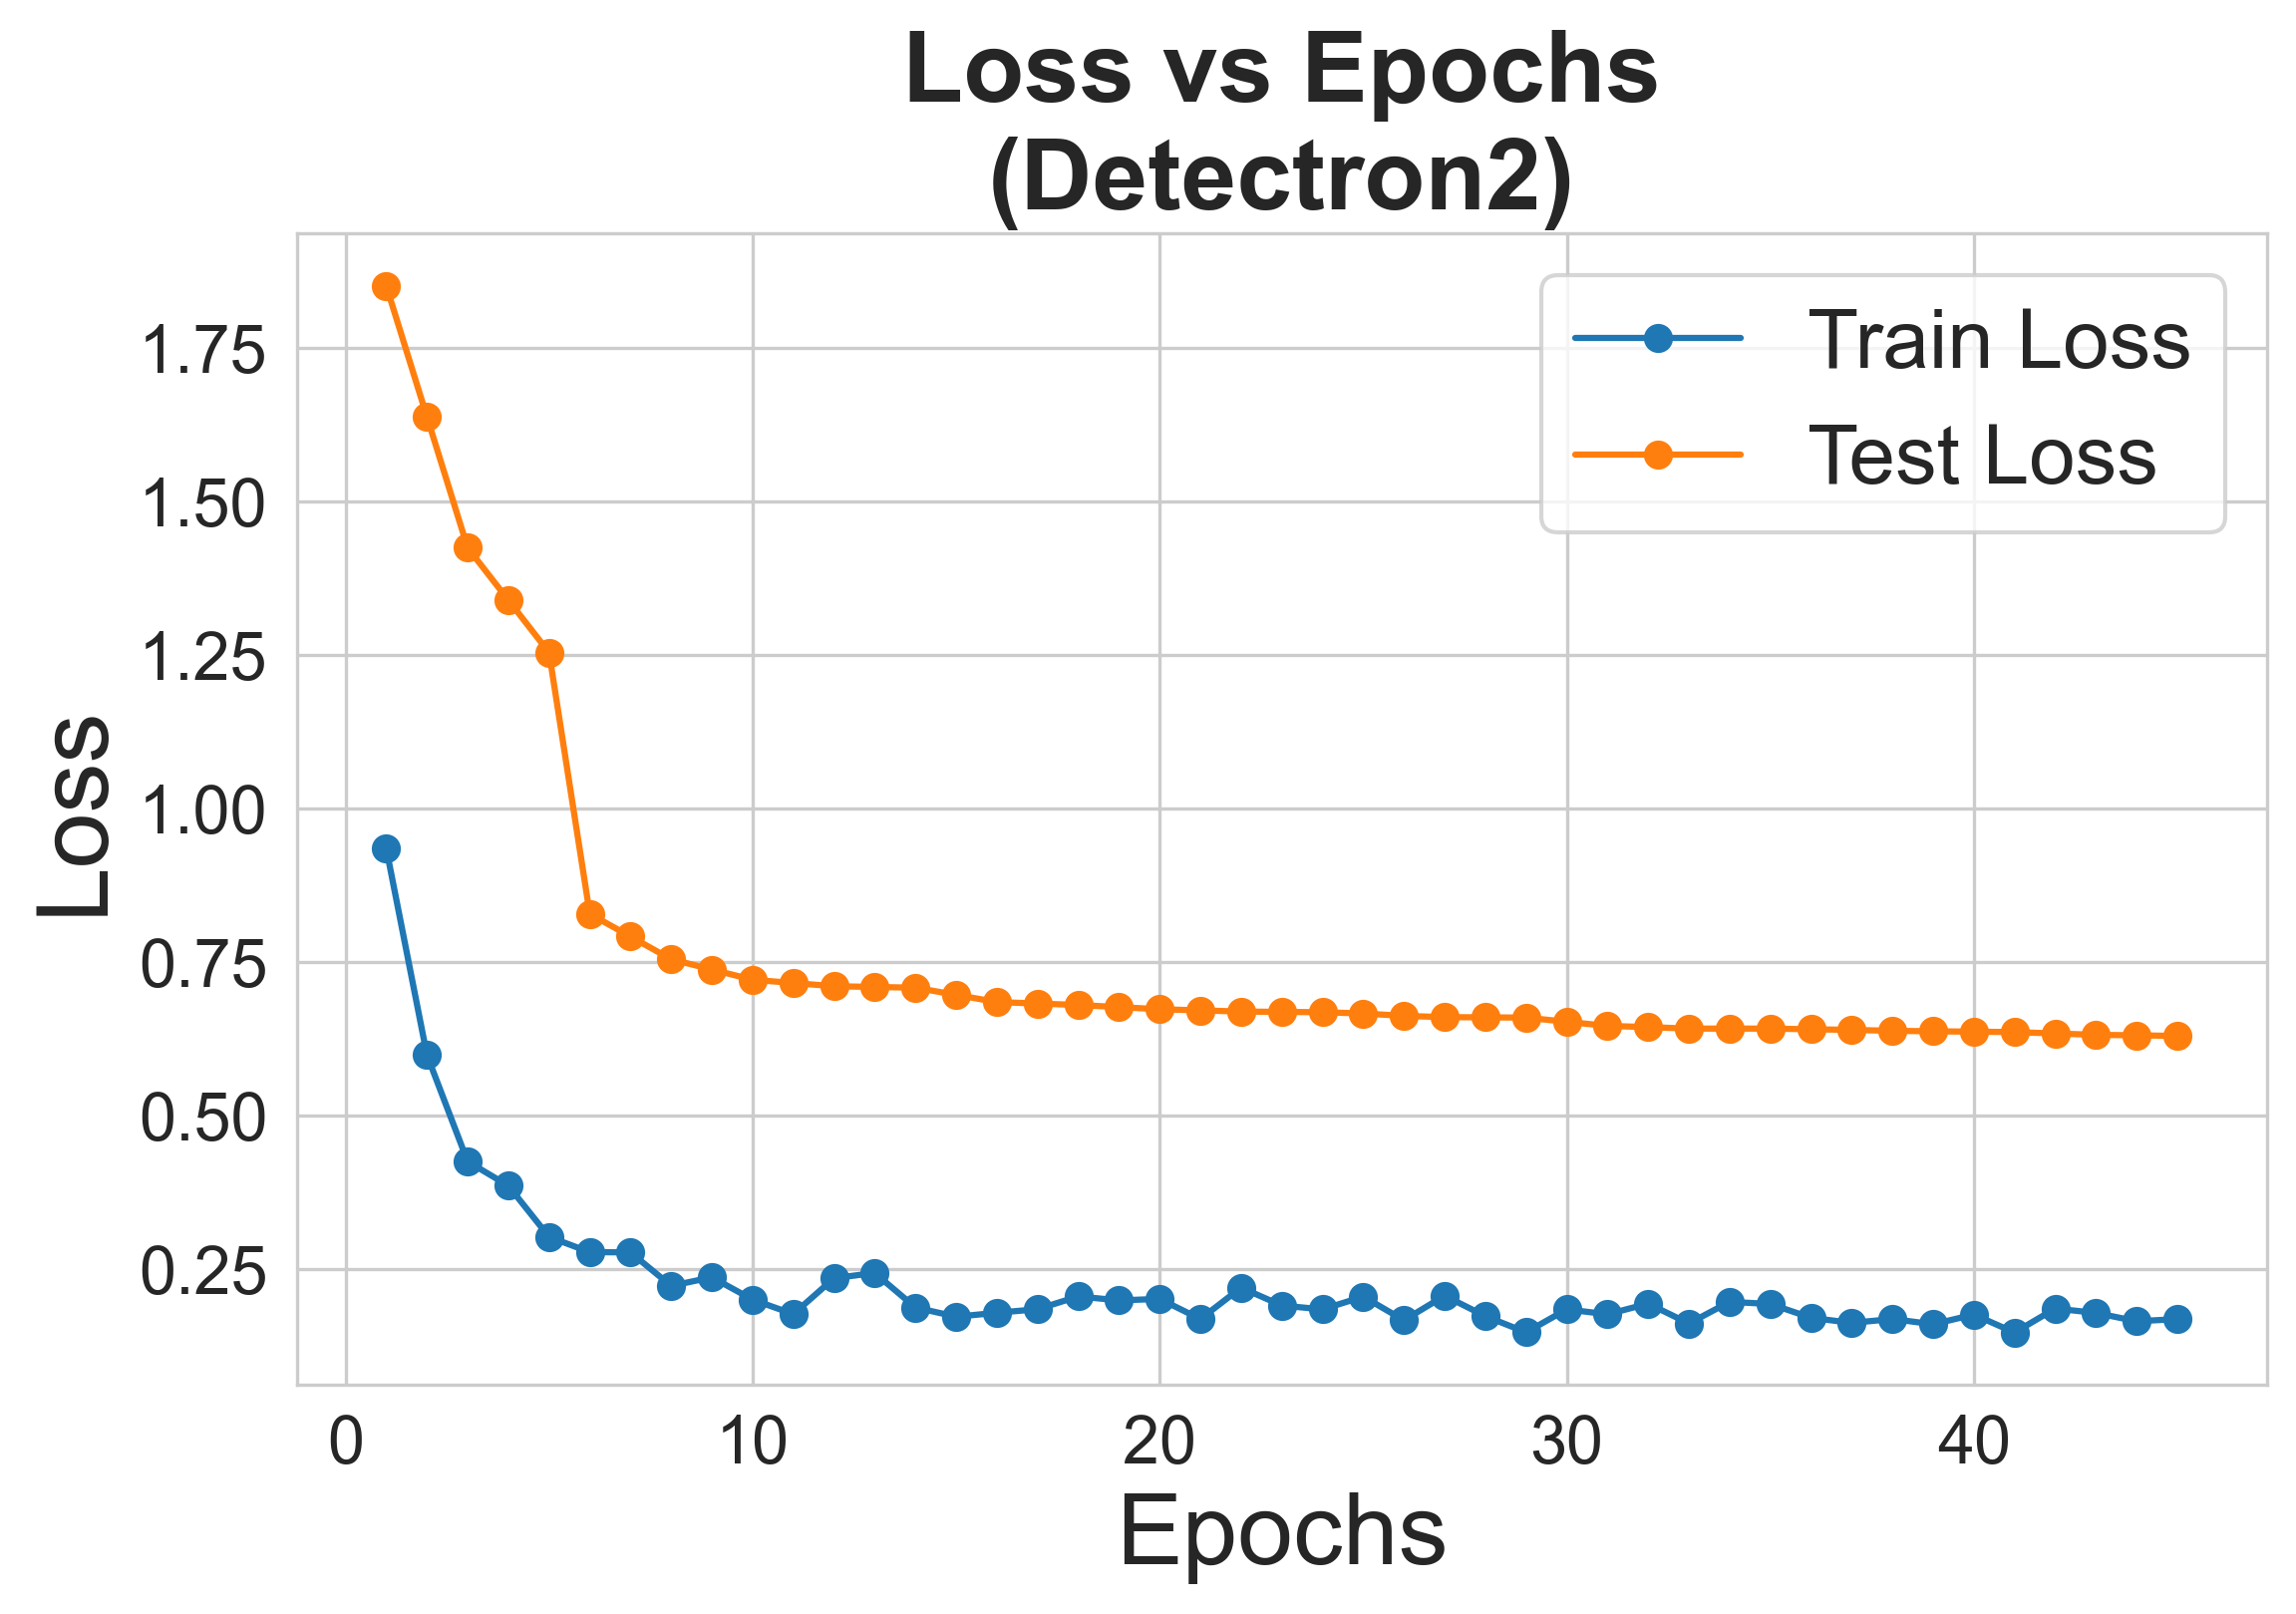

In [ ]:
metrics_df = pd.read_json(f'./mask_worms/metrics.json', lines=True)
metrics_df = metrics_df[metrics_df['validation_loss'].notnull()].reset_index(drop=True)
generate_train_test_loss(metrics_df['loss_cls'], metrics_df['validation_loss'], 'Detectron2')